## Decision Tree
Decision tree is a supervised hierarchical classification algorithm, however it can also be used for regression but mostly preferred for classification problems. It is tree structured classifier which simply asks a question, and based on the answer (Yes/No), it further split the tree into subtrees. It has 3 main components `Root Node`, `Internal Node` and `Leaf Node`. Root Node is where the classification takes place and goes further to internal node and finally the leaf node is where the classification ends. <br>
> <img src="https://static.javatpoint.com/tutorial/machine-learning/images/decision-tree-classification-algorithm.png" width="500" height="400">

### How Decision Tree works
Decision tree first finds the Root node (the best column with which it can start classifying the whole dataset), which is decided based on the least `Gini` or `Entropy` score. The column with the least gini score is choosen as the root node then it further splits it data on both side. This time it looks for the best `Decision Node` or also called `Internal Node`, it is also decided based on the column with least `gini` score, these process continues till there is no column left or the gini score of `leaf node` is lesser than other columns.

for example, suppose we have a dataset something like this and we had to make a decision tree model for it.<br>
> 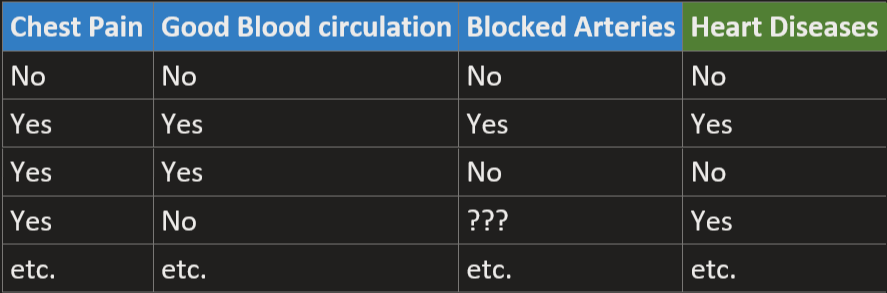

Then we first will need to find root node (the columns which can predict the dependent column better than other), for that we will try to find the gini score of all columns and select the column with least score. for this example we can select the `chest pain` column as the root node as it has the least gini score among all.
> 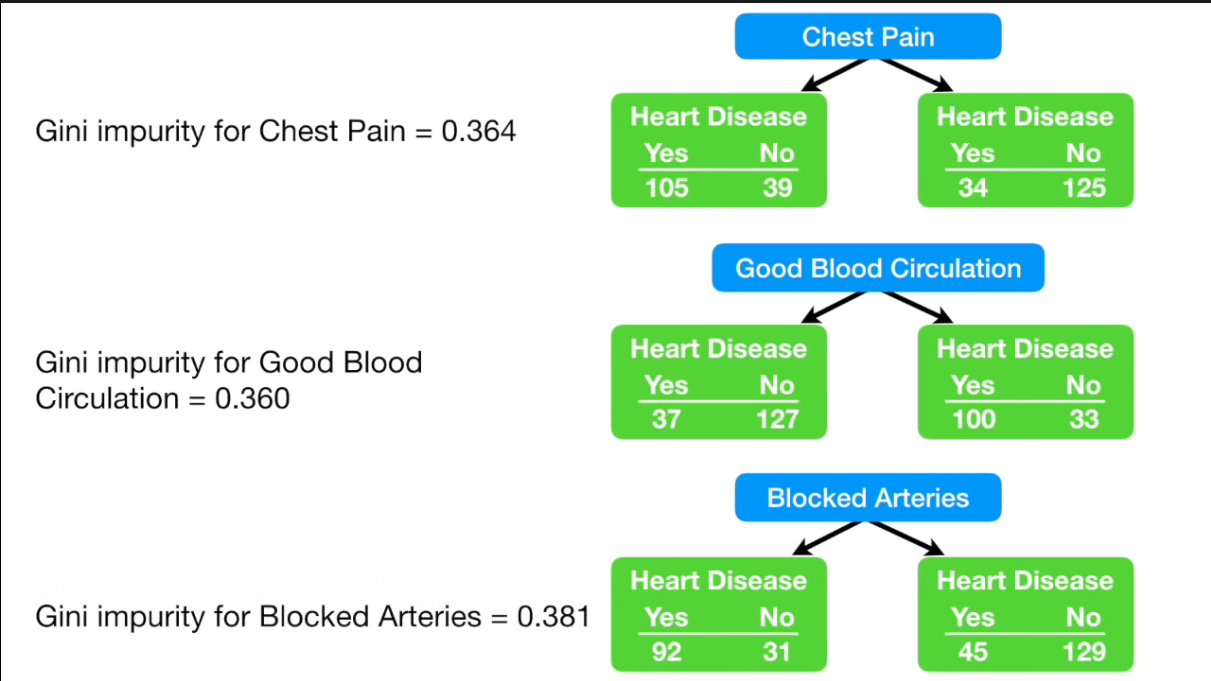

Then similarly we will find the `Decision Node` for both side, if the gini score of leaf node of root node has less than other columns then we will leave it as it is. And after following this we will have our decision tree.

For more detail watch this [video](https://www.youtube.com/watch?v=7VeUPuFGJHk) by `StatQuest`.

### Terminologies and other facts
* **Impurity** is when the leaf node doesn't have 100% one answer, for example in below case, in the left leaf node we have both yes and no so it has impurity but in right leaf node we have 100% no answer so it has no impurity. <br>
> 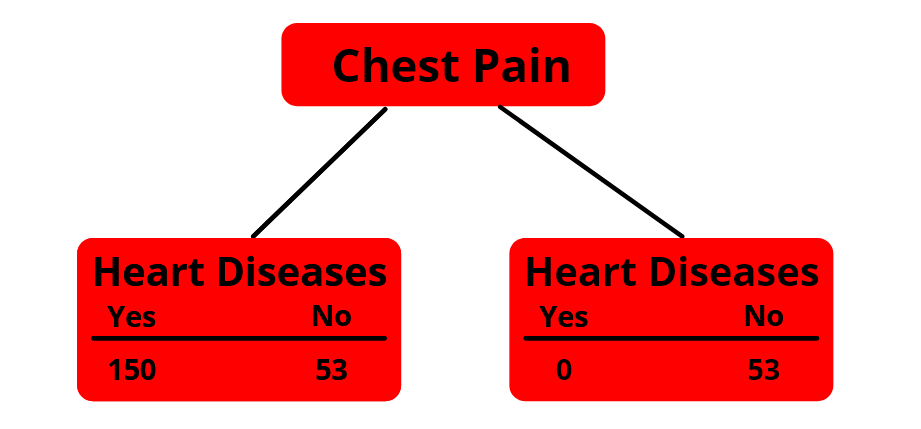

* **Gini** is a metrics for measuring impurity of a node, and its probability values ranges from 0-0.5. it is calculated with the formula. <br>
> <img src="https://media.geeksforgeeks.org/wp-content/uploads/20200620175232/Screenshot-2020-06-20-at-5.51.42-PM.png" width="400" height="400">

* **Entropy** is another metrics for measuring the impurity of a node and its probability values ranges from 0-1. it is calculated with the following formula <br>
> <img src="https://media.geeksforgeeks.org/wp-content/uploads/20200620173618/Screenshot-2020-06-20-at-5.35.34-PM.png" width="400" height="400">

* **Entropy vs Gini**
> <img src="https://media.geeksforgeeks.org/wp-content/uploads/20200620180439/Gini-Impurity-vs-Entropy.png" width="400" height="400"> <br>
The internal working of both methods is very similar and both are used for computing the feature/split after every new splitting. But if we compare both the methods then Gini Impurity is more efficient than entropy in terms of computing power. As you can see in the graph for entropy, it first increases up to 1 and then starts decreasing, but in the case of Gini impurity it only goes up to 0.5 and then it starts decreasing, hence it requires less computational power. The range of Entropy lies in between 0 to 1 and the range of Gini Impurity lies in between 0 to 0.5. Hence we can conclude that Gini Impurity is better as compared to entropy for selecting the best features.

* These above formula is used for measuring the impurity for leaf node, for root or decision node we use weighted average of the leaf node. We can also use the `information gain` for measuring the performance of a node.
> 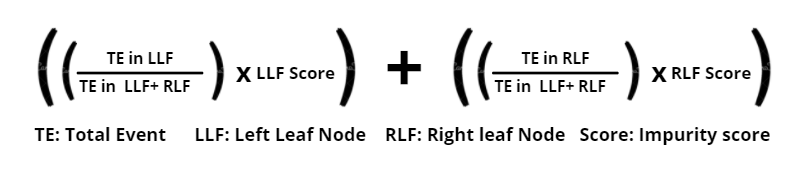

* **Information Gain** or IG is a statistical property that measures how well a given attribute separates the training examples according to their target classification. To calculate this we substract the weighted impurity score of both child nodes with the parent node.

* **Pruning**: When we remove sub-nodes of a decision node, this process is called pruning. You can say the opposite process of splitting. We remove the sub-nodes of decision tree to reduce the variance.

## Building Decision Tree Classifier

In [1]:
import pandas as pd # <---- for handling tabular data
from sklearn.tree import DecisionTreeClassifier # <--- for building Decision Tree classifier model
from sklearn.tree import plot_tree # <-- for plotting decision tree
from sklearn.preprocessing import LabelEncoder # <-- for encoding labels
import matplotlib.pyplot as plt # <---- for visualization
from sklearn.model_selection import train_test_split # <--- for splitting dataset 
from sklearn.metrics import confusion_matrix # <--- for evaluation

In [2]:
df = pd.read_csv('Iris.csv')
df.sample(10, random_state=54)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
45,46,4.8,3.0,1.4,0.3,Iris-setosa
91,92,6.1,3.0,4.6,1.4,Iris-versicolor
103,104,6.3,2.9,5.6,1.8,Iris-virginica
94,95,5.6,2.7,4.2,1.3,Iris-versicolor
96,97,5.7,2.9,4.2,1.3,Iris-versicolor
42,43,4.4,3.2,1.3,0.2,Iris-setosa
79,80,5.7,2.6,3.5,1.0,Iris-versicolor
116,117,6.5,3.0,5.5,1.8,Iris-virginica
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
df.drop(['Id'], axis=1, inplace=True)

In [5]:
# seperating features and label
features = df.iloc[:, :-1]
label = df.iloc[:, -1]
print(features.shape, label.shape)

(150, 4) (150,)


In [6]:
# we have to encode the labels
le = LabelEncoder()
new_label = le.fit_transform(label)

In [56]:
# splitting dataset fro training and testing
x_train, x_test, y_train, y_test = train_test_split(features, new_label, test_size=0.2, random_state=45)

In [57]:
# let's create our model
model = DecisionTreeClassifier(random_state=91)
model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=91)

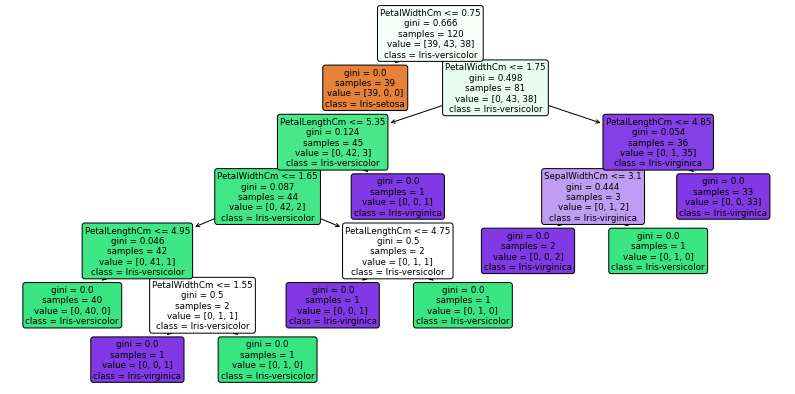

In [58]:
plt.figure(figsize=(14,7))
plot_tree(model, filled=True, rounded=True, feature_names=x_train.columns, 
          class_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
plt.show()

In [59]:
y_pred = model.predict(x_test)

In [60]:
# plotting confusion matrix
print(confusion_matrix(y_test, y_pred))

[[11  0  0]
 [ 0  7  0]
 [ 0  0 12]]


In [61]:
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

1.0
1.0


We got great model but let's look the decision tree pruning steps and find out best alpha value

### Cost Complexity Pruning
Decision Trees are notorious for being overfit to the Training Dataset, and there are a lot of parameters, like `max_depth` and `min_samples`, that are designed to reduce overfitting. However, pruning a tree with `cost complexity pruning (ccp)` can simplify the whole process of finding a smaller tree that impoves the accuracy with the Testing Dataset.

Pruning a decision tree is all about finding the right value for the pruning parameter, `alpha` , which controls how little or how much pruning happens. One way to find the optimal value for alpha is to plot the accuracy of the tree as a function of different values. We'll do this for both the Training Dataset and the Testing Dataset.

First, let's extract the different values of `alpha` that are available for this tree and build a pruned tree for each value for `alpha` . NOTE: We omit the maximum value for alpha with `ccp_alphas = ccp_alphas[:-1]` because it would prune all leaves, leaving us with only a root instead of a tree.

In [51]:
path = model.cost_complexity_pruning_path(x_train, y_train) # determine values for alpha
ccp_alphas = path.ccp_alphas # extract different values for alpha
ccp_alphas = ccp_alphas[:-1] # exclude the maximum value for alpha
models = [] # create an array that we will put decision trees into

# now create one decision tree per value for alpha and store it in the array
for ccp_alpha in ccp_alphas:
    model = DecisionTreeClassifier(random_state=6, ccp_alpha=ccp_alpha)
    model.fit(x_train, y_train)
    models.append(model)

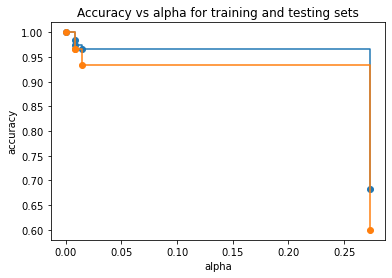

In [52]:
# Now let's graph the accuracy of the trees using the Training Dataset and the Testing Dataset as a function of alpha.
train_scores = [model.score(x_train, y_train) for model in models]
test_scores = [model.score(x_test, y_test) for model in models]

fig, ax = plt. subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test", drawstyle="steps-post")
ax. legend
plt.show()

In [53]:
ccp_alphas

array([0.        , 0.00795455, 0.00810185, 0.01484848, 0.27334362])

In [54]:
print(train_scores)
print(test_scores)

[1.0, 0.9833333333333333, 0.975, 0.9666666666666667, 0.6833333333333333]
[1.0, 0.9666666666666667, 0.9666666666666667, 0.9333333333333333, 0.6]


so according to this, training and testing score is best at alpha value 0